#2º Período Trainee CIS

## Passo a passo adotado:


1. Exploratória / Visualização (NAs)
2. Limpeza
3. Transformação (normalização)
4. Redução (PCA)
5. Clustering
6. Regressão



In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [70]:
df = pd.read_csv('/content/winequality-white.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 1º Passo: Visualização de variáveis e de NAs

In [71]:
df.shape

(4898, 12)

In [72]:
np.unique(df.isna().to_numpy(),return_counts=True) # 4.898 x 12 = 58.776, ou seja, não existe nenhum NA nas 12 colunas do data frame

(array([False]), array([58776]))

In [73]:
# outra forma de visualizar:

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

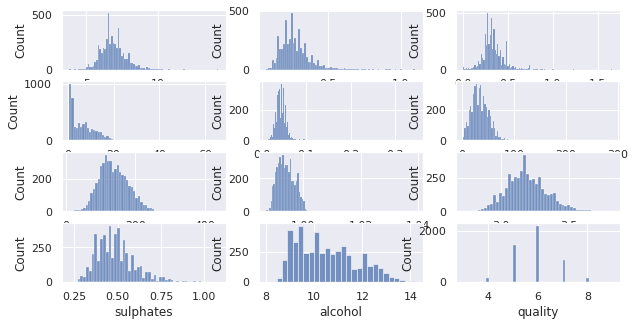

In [74]:
sns.set(rc={'figure.figsize':(10,5)})
for i, column in enumerate(df.columns, 1): # visualizando as distribuições das variáveis
    plt.subplot(4,3,i)
    sns.histplot(df[column])

# Segundo passo: Limpeza

Podemos pular o segundo passo, por conta do banco de dados já estar bem organizado

# Terceiro passo: Normalização

In [75]:
for i in df.columns:
  df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


In [76]:
for i in df.columns:
  print(df[i].min(),df[i].max())

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


# Quarto passo: PCA (redução)

In [77]:
from sklearn.decomposition import PCA

In [78]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','density','sulphates','alcohol']

In [79]:
x = df.loc[:, features].values
y = df.loc[:,['quality']].values # mais para a frente, vamos fazer uma regressão para predizer a qualidade a partir dos outros parâmetros

In [80]:
pca = PCA(n_components=6)
pca.fit(x)

PCA(n_components=6)

In [81]:
print(pca.components_)

[[-0.06125912  0.02121812 -0.04132217 -0.20275637 -0.10982554 -0.09386678
  -0.258637   -0.22594863 -0.22594863 -0.03591806  0.87282189]
 [-0.01366814 -0.0387578   0.05183238 -0.02571183 -0.00400958  0.05022998
   0.13703533  0.01238127  0.01238127  0.98257376  0.08881289]
 [-0.02381852  0.84063398 -0.10108673  0.21768578  0.03017782  0.11193393
   0.40312439  0.08984876  0.08984876 -0.03865836  0.20389292]
 [ 0.38128865 -0.38495569  0.40128075  0.25263318 -0.08805845  0.2913229
   0.48306882  0.11504265  0.11504265 -0.13987966  0.33100387]
 [-0.72442429 -0.28752451 -0.32541819  0.00777843 -0.04140101  0.33019864
   0.39189475 -0.0852452  -0.0852452  -0.07737045  0.04165624]
 [-0.12086966 -0.10762452 -0.2496764   0.68941062 -0.35976699 -0.11932124
  -0.34179596  0.2787264   0.2787264   0.05882755  0.12980899]]


In [82]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_)) # vamos utilizar até o 6 componente do PCA e manter mais de 90% da variancia dos dados

[0.45380863 0.1646188  0.09890662 0.08069691 0.06781988 0.04956467] 0.9154155226266907


In [83]:
print(pca.explained_variance_) #eigenvalues

[0.04937894 0.01791218 0.01076203 0.00878063 0.00737948 0.00539313]


In [84]:
X_pca = pca.transform(x)
print("original shape:   ", x.shape, '100.00%')
print("transformed shape:", X_pca.shape,f'{round(sum(pca.explained_variance_ratio_)*100,2)}%' )

original shape:    (4898, 11) 100.00%
transformed shape: (4898, 6) 91.54%


# Quinto passo: Clustering

## K-means

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [92]:
k = 2
for i in range(10):
  kmeans = KMeans(n_clusters=k)
  pred = kmeans.fit_predict(X_pca)
  print(silhouette_score(X_pca, kmeans.labels_)) #vimos que é melhor dividirmos os vinhos em dois clusters
  k += 1

0.30948515924665265
0.21542719848090877
0.21287564018571348
0.18440035227002077
0.19331259610173676
0.18016779380227294
0.17356579481346843
0.163221041978268
0.1627778941873555
0.1605668813917104


In [93]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X_pca)

##K-medoids (PAM):

Não será necessário o clustering pelo método kmedoids, já que foi visto a partir da visualização das variáveis que não existem fortes outliers no dataset

# Sexto passo: Regressão

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [95]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
df['predict'] = model.predict(x)

In [96]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [-0.07065557 -0.27999301  0.06651681 -0.31317031  0.08587186  0.36159075
  0.00751427  0.75223047  0.75223047  0.08178223  0.70264049]
Model intercept: 0.0


In [97]:
print(df['predict'].min(),df['predict'].max()) 

0.11199010270190306 1.4359899948899957


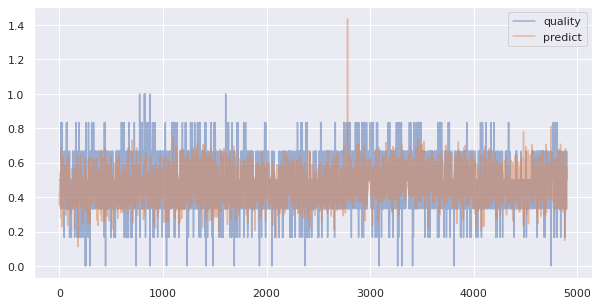

In [98]:
df[['quality', 'predict']].plot(alpha=0.5);

Antes, utilizei o seguinte código e estava obtendo uma predição bem pior (por conta do X_pca), depois, se puderem me explicar o porquê, por favor, seria de muita ajuda 

In [99]:
model = LinearRegression(fit_intercept=False)
model.fit(X_pca, y)
df['predict'] = model.predict(X_pca)